In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame, Series
%matplotlib inline

In [2]:
df = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
sample = pd.read_csv('data/sample_submission.csv')

## train data 형태 확인

In [3]:
df.loc[0]

AnimalID                        A671945
Name                            Hambone
DateTime            2014-02-12 18:22:00
OutcomeType             Return_to_owner
OutcomeSubtype                      NaN
AnimalType                          Dog
SexuponOutcome            Neutered Male
AgeuponOutcome                   1 year
Breed             Shetland Sheepdog Mix
Color                       Brown/White
Name: 0, dtype: object

In [4]:
df.tail()

AnimalID  Name             DateTime OutcomeType OutcomeSubtype  \
26724  A702446   NaN  2015-05-14 11:56:00    Transfer        Partner   
26725  A718934   NaN  2016-01-20 18:59:00    Transfer           SCRP   
26726  A698128  Zeus  2015-03-09 13:33:00    Adoption            NaN   
26727  A677478   NaN  2014-04-27 12:22:00    Transfer        Partner   
26728  A706629   NaN  2015-07-02 09:00:00    Transfer           SCRP   

      AnimalType SexuponOutcome AgeuponOutcome                    Breed  \
26724        Cat    Intact Male        1 month   Domestic Shorthair Mix   
26725        Cat  Spayed Female       3 months   Domestic Shorthair Mix   
26726        Dog  Neutered Male        4 years  Old English Bulldog Mix   
26727        Cat    Intact Male        4 weeks   Domestic Shorthair Mix   
26728        Cat    Intact Male         1 year   Domestic Shorthair Mix   

                   Color  
26724  Brown Tabby/White  
26725        Brown Tabby  
26726          White/Tan  
26727              Black  
26728  Brown Tabby/White

In [5]:
df['OutcomeType'].value_counts()

Adoption           10769
Transfer            9422
Return_to_owner     4786
Euthanasia          1555
Died                 197
Name: OutcomeType, dtype: int64

In [6]:
df['OutcomeSubtype'].value_counts()

Partner                7816
Foster                 1800
SCRP                   1599
Suffering              1002
Aggressive              320
Offsite                 165
In Kennel               114
Behavior                 86
Rabies Risk              74
Medical                  66
In Foster                52
Enroute                   8
Court/Investigation       6
At Vet                    4
In Surgery                3
Barn                      2
Name: OutcomeSubtype, dtype: int64

In [7]:
df['AnimalType'].value_counts()

Dog    15595
Cat    11134
Name: AnimalType, dtype: int64

In [8]:
df['SexuponOutcome'].value_counts()

Neutered Male    9779
Spayed Female    8820
Intact Male      3525
Intact Female    3511
Unknown          1093
Name: SexuponOutcome, dtype: int64

In [9]:
df['AgeuponOutcome'].value_counts()

1 year       3969
2 years      3742
2 months     3397
3 years      1823
1 month      1281
3 months     1277
4 years      1071
5 years       992
4 months      888
6 years       670
3 weeks       659
5 months      652
6 months      588
8 years       536
7 years       531
2 weeks       529
10 months     457
10 years      446
8 months      402
4 weeks       334
9 years       288
7 months      288
12 years      234
9 months      224
1 weeks       171
11 months     166
1 week        146
13 years      143
11 years      126
3 days        109
2 days         99
14 years       97
15 years       85
1 day          66
6 days         50
4 days         50
16 years       36
5 days         24
0 years        22
17 years       17
5 weeks        11
18 years       10
19 years        3
20 years        2
Name: AgeuponOutcome, dtype: int64

In [10]:
df['Breed'].value_counts()

Domestic Shorthair Mix                     8810
Pit Bull Mix                               1906
Chihuahua Shorthair Mix                    1766
Labrador Retriever Mix                     1363
Domestic Medium Hair Mix                    839
German Shepherd Mix                         575
Domestic Longhair Mix                       520
Siamese Mix                                 389
Australian Cattle Dog Mix                   367
Dachshund Mix                               318
Boxer Mix                                   245
Miniature Poodle Mix                        233
Border Collie Mix                           229
Australian Shepherd Mix                     163
Rat Terrier Mix                             157
Catahoula Mix                               157
Jack Russell Terrier Mix                    146
Yorkshire Terrier Mix                       143
Domestic Shorthair                          143
Chihuahua Longhair Mix                      142
Siberian Husky Mix                      

In [11]:
df['Color'].value_counts()

Black/White                  2824
Black                        2292
Brown Tabby                  1635
Brown Tabby/White             940
White                         931
Brown/White                   884
Orange Tabby                  841
Tan/White                     773
Tricolor                      752
Blue/White                    702
Black/Tan                     672
White/Black                   643
Brown                         639
Tan                           628
White/Brown                   569
Tortie                        530
Calico                        517
Orange Tabby/White            455
Brown Brindle/White           450
Blue                          450
Black/Brown                   436
Blue Tabby                    433
White/Tan                     389
Red                           337
Torbie                        335
Brown/Black                   333
Red/White                     331
Blue Tabby/White              241
Brown Brindle                 232
Chocolate/Whit

    - 10개의 Column
        - AnimalID, Name, DateTime, OutcomeType, OutcomeSubtype, AnimalType, SexuponOutcome, AgeuponOutcome, Breed, Color
    1. 각 동물은 AnimalID 라는 고유의 값을 가짐
    2. Name에 NaN 값이 존재
    3. DateTime
    4. OutcomeType은 5가지
        - Adoption, Transfer, Return_to_owner, Euthanasia, Died
    5. OutcomeSubtype은 16가지
        - NaN 존재
    6. AnimalType은 2가지
        - Dog, Cat
    7. SexuponOutcome은 4가지
        - Neutered Male(중성화 수컷), Spayed Female(중성화 암컷), Intact Male(수컷), Intact Female(암컷)
    8. AgeuponOutcome은 매우 다양
    9. Breed(품종), 1380종
    10. Color
    
- 전처리 필요한 변수들
    - Name
    - DateTime
    - AgeuponOutcome
        - 일수로 바꾸어 계산이 필요
    - Breed
        - 크기(소/중/대), 품종(순종/믹스), 장/단모 등
    - Color

## 전처리

### NaN 처리

In [12]:
df['Name'] = df['Name'].replace(np.nan, 'Unnamed', regex=True)
df['AgeuponOutcome'] = df['AgeuponOutcome'].replace(np.nan, '0 days', regex=True)
df['OutcomeSubtype'] = df['OutcomeSubtype'].replace(np.nan, 'None', regex=True)
df['SexuponOutcome'] = df['SexuponOutcome'].replace(np.nan, 'Unknown', regex=True)

### 이름 분류 (Named / Unnamed)

In [13]:
for i in range(0, len(df['Name'])):
    if df['Name'][i] != 'Unnamed':
        df['Name'][i] = 'Named'

In [14]:
df['Name'].value_counts()

Named      19038
Unnamed     7691
Name: Name, dtype: int64

In [15]:
# AgeuponOutcome -> AgeGroup 그룹 추가 by hoon

df['AgeGroup'] = df['AgeuponOutcome']
for i in range(0, len(df['AgeuponOutcome'])):
    num, unit = (df['AgeuponOutcome'][i]).split(' ')
    if unit == 'year' or unit == 'years':
        df['AgeGroup'][i] = 'year'
    elif unit == 'month' or unit == 'months':
        df['AgeGroup'][i] = 'month'
    elif unit == 'week' or unit == 'weeks':
        df['AgeGroup'][i] = 'week'
    elif unit == 'day' or unit == 'days':
        df['AgeGroup'][i] = 'day'

### 나이 단위를 일(day) 단위로 통일

In [38]:
for i in range(0, len(df['AgeuponOutcome'])):
    num, unit = (df['AgeuponOutcome'][i]).split(' ')
    if unit == 'year' or unit == 'years':
        df['AgeuponOutcome'][i] = int(num) * 365
    elif unit == 'month' or unit == 'months':
        df['AgeuponOutcome'][i] = int(num) * 30
    elif unit == 'week' or unit == 'weeks':
        df['AgeuponOutcome'][i] = int(num) * 7
    elif unit == 'day' or unit == 'days':
        df['AgeuponOutcome'][i] = int(num)

In [39]:
# 변경 여부를 확인하고, 0이 40건임을 확인
df['AgeuponOutcome'].value_counts()

365     3969
730     3742
60      3397
1095    1823
30      1281
90      1277
1460    1071
1825     992
120      888
2190     670
21       659
150      652
180      588
2920     536
2555     531
14       529
300      457
3650     446
240      402
28       334
7        317
3285     288
210      288
4380     234
270      224
330      166
4745     143
4015     126
3        109
2         99
5110      97
5475      85
1         66
6         50
4         50
0         40
5840      36
5         24
6205      17
35        11
6570      10
6935       3
7300       2
Name: AgeuponOutcome, dtype: int64

### Breed
* Pure/Mix 분류

In [40]:
df['Type'] = Series(range(len(df['Breed'])))

In [41]:
for i in range(len(df['Breed'])):
    if '/' in df['Breed'][i] or 'Mix' in df['Breed'][i]:
        df['Type'][i] = 'Mix'
    else:
        df['Type'][i] = 'Pure'

c:\python27\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [42]:
df['Type'].value_counts()

Mix     25338
Pure     1391
Name: Type, dtype: int64

### Color

In [43]:
# number of color 색상의 갯수, 0은 한색, 1은 두색이상
def get_num(x):
    x = str(x)
    if x.find('/') >= 0: return 1
    else: return 0

df['numCol'] = df.Color.apply(get_num)

In [44]:
# Color 단순화 1단계 '/' 풀기
from pandas import Series

bymain = []

for i in df['Color']:
    i = str(i)
    if i.find('/') >= 0:
        f, s = i.split('/')
        bymain.append(f)
    else:
        bymain.append(i)

df['Color'] = Series(bymain)

In [45]:
def get_mainC(x):
    x = str(x)
    if x.find('Black') >= 0: return 'dark'
    if x.find('White') >= 0: return 'light'
    if x.find('Brown') >= 0: return 'dark'
    if x.find('Orange') >= 0: return 'light'
    if x.find('Blue') >= 0: return 'medium'
    if x.find('Red') >= 0: return 'medium'
    
    if x.find('Tan') >= 0: return 'medium'
    if x.find('Tortie') >= 0: return 'dark'
    if x.find('Calico') >= 0: return 'medium'
    if x.find('Torbie') >= 0: return 'medium'
    if x.find('Buff') >= 0: return 'light'
    if x.find('Sable') >= 0: return 'dark'
    if x.find('Cream') >= 0: return 'light'
    if x.find('Yellow') >= 0: return 'light'
    if x.find('Lynx') >= 0: return 'light'
    if x.find('Chocolate') >= 0: return 'dark'
    if x.find('Gray') >= 0: return 'dark'
    if x.find('Liver') >= 0: return 'dark'
    if x.find('Flame') >= 0: return 'light'
    if x.find('Agouti') >= 0: return 'dark'
    if x.find('Pink') >= 0: return 'light'
    if x.find('Ruddy') >= 0: return 'medium'
    if x.find('Gold') >= 0: return 'light'
    if x.find('Silver') >= 0: return 'light'
    if x.find('Lilac') >= 0: return 'light'
    if x.find('Seal') >= 0: return 'medium'
    if x.find('Fawn') >= 0: return 'light'
    if x.find('Apricot') >= 0: return 'light'
    else: return x

df['Color'] = df.Color.apply(get_mainC)

In [46]:
df.tail()

AnimalID     Name             DateTime OutcomeType OutcomeSubtype  \
26724  A702446  Unnamed  2015-05-14 11:56:00    Transfer        Partner   
26725  A718934  Unnamed  2016-01-20 18:59:00    Transfer           SCRP   
26726  A698128    Named  2015-03-09 13:33:00    Adoption           None   
26727  A677478  Unnamed  2014-04-27 12:22:00    Transfer        Partner   
26728  A706629  Unnamed  2015-07-02 09:00:00    Transfer           SCRP   

      AnimalType SexuponOutcome AgeuponOutcome                    Breed  \
26724        Cat    Intact Male             30   Domestic Shorthair Mix   
26725        Cat  Spayed Female             90   Domestic Shorthair Mix   
26726        Dog  Neutered Male           1460  Old English Bulldog Mix   
26727        Cat    Intact Male             28   Domestic Shorthair Mix   
26728        Cat    Intact Male            365   Domestic Shorthair Mix   

       Color Type  numCol  
26724   dark  Mix       1  
26725   dark  Mix       0  
26726  light  Mix       1  
26727   dark  Mix       0  
26728   dark  Mix       1

## Data 시각화

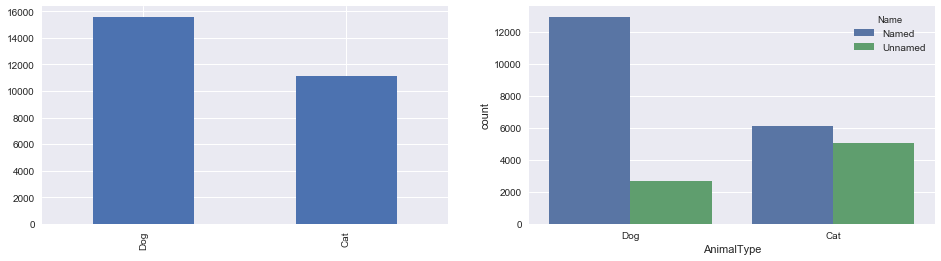

In [20]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))
df['AnimalType'].value_counts().plot(kind = 'bar', ax=ax1)
sns.countplot(data=df, x='AnimalType', hue='Name', ax=ax2)

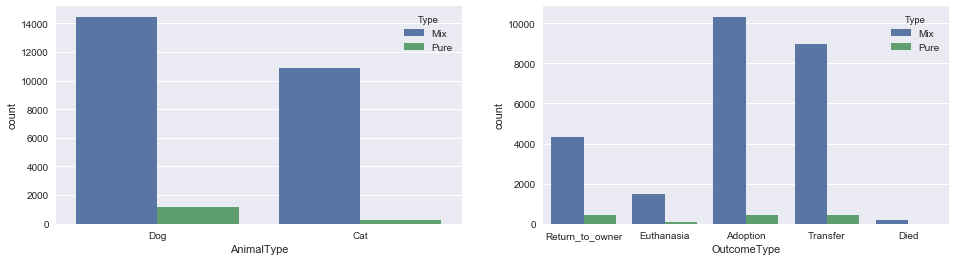

In [21]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))
sns.countplot(data=df, x='AnimalType', hue='Type', ax=ax1)
sns.countplot(data=df, x='OutcomeType', hue='Type', ax = ax2)

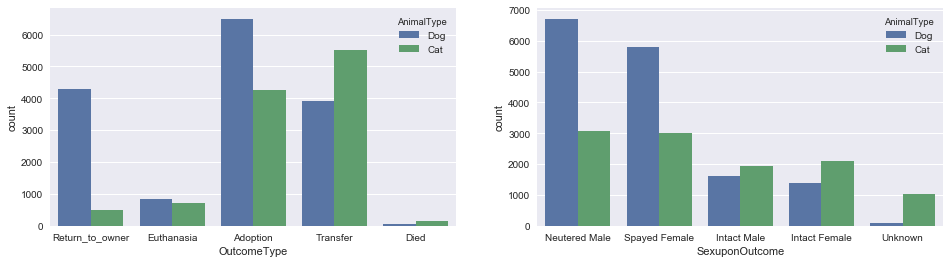

In [22]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))
sns.countplot(data=df, x='OutcomeType', hue='AnimalType', ax = ax1)
sns.countplot(data=df, x='SexuponOutcome', hue='AnimalType', ax=ax2)

* OutcomeType에서 AniamlType별 차이가 크게 발생한다
    * 개는 주인이 되찾아간 비율이 고양이에 비해 확연히 큼
    * 고양이는 입양되거나 다른 시설로 보내진 경우가 많다
    * 보호기간 동안 죽거나 안락사 된 비율은 고양이와 개, 모두 낮다
* SexuponOutcome에서 AnimalType별 차이가 발생한다
    * 개는 성별에 관계없이 중성화된 비율이 높게 나타난다
    * 고양이도 중성화된 비율이 높으나, 크게 차이가 발생하지 않는다
    * 고양이의 경우 성별이 누락된 경우가 있다 (Unknown)

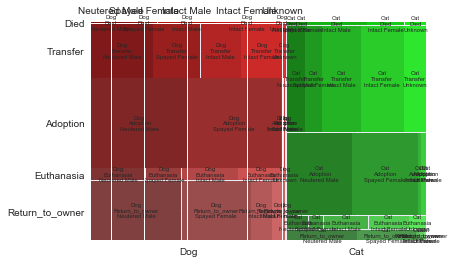

In [23]:
from statsmodels.graphics.mosaicplot import mosaic
plt.rcParams['font.size'] = 7
mosaic = mosaic(df, ['AnimalType', 'OutcomeType', 'SexuponOutcome'])

* AnimalType에 관계없이, 중성화 된 개체가 Adoption에서 높은 비율을 차지함
* Adoption과 개체의 성별은 상관도가 낮은 것으로 판단됨
* 전반적으로 성별 자체의 영향은 낮은것으로 보이며, Adoption과 Return to owner에만 중성화에 따른 비율이 다르다

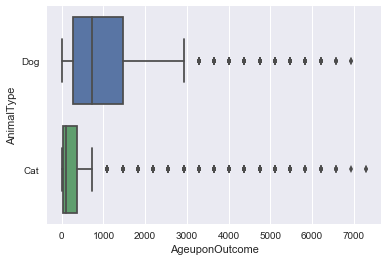

In [24]:
sns.boxplot(x='AgeuponOutcome', y='AnimalType', data = df)

In [25]:
df['AgeuponOutcome'] = df['AgeuponOutcome'].astype(int)

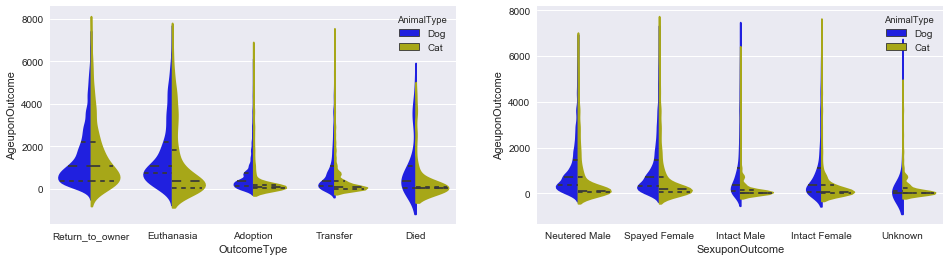

In [26]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))
sns.violinplot(x="OutcomeType", y="AgeuponOutcome", hue="AnimalType", data=df, split=True,
               inner="quart", palette={"Dog": "b", "Cat": "y"}, ax=ax1)
sns.violinplot(x="SexuponOutcome", y="AgeuponOutcome", hue="AnimalType", data=df, split=True,
               inner="quart", palette={"Dog": "b", "Cat": "y"}, ax=ax2)
sns.despine(left=True)

* 보호소에 어린 고양이가 많이 들어옴
* 따라서 고양이의 OutcomeType은 모두 어린 쪽에 집중되어있다
    * 고양이의 나이는 크게 영향이 없을 것으로 예상됨
    * 단, 나이가 많은 고양이의 경우, 안락사 되는 경우가 있다
    * 고양이는 다쳐서 보호소에 들어오는 경우가 많지 않을까 예상
* 다양한 연령대의 개들이 보호소에 들어옴
    * 입양되는 비율은 어린 개에 집중되어 있으며, 나이가 많을 수록 안락사의 비율이 높았다
    * 개는 고양이에 비해 죽거나 안락사 되는 비율이 적은 것으로 보인다

In [27]:
subset = df[['OutcomeSubtype', 'OutcomeType']]
tuples = [tuple(x) for x in subset.values]

In [28]:
from collections import Counter

val_3=Counter(tuples)

In [29]:
sub_df1 = pd.DataFrame(val_3.values(), columns=['count'], index=pd.MultiIndex.from_tuples(val_3.keys()))
sub_df2 = sub_df1.unstack()
sub_df2.columns = sub_df2.columns.droplevel()  # Drop `count` label.
sub_df2 = sub_df2.div(sub_df2.sum())

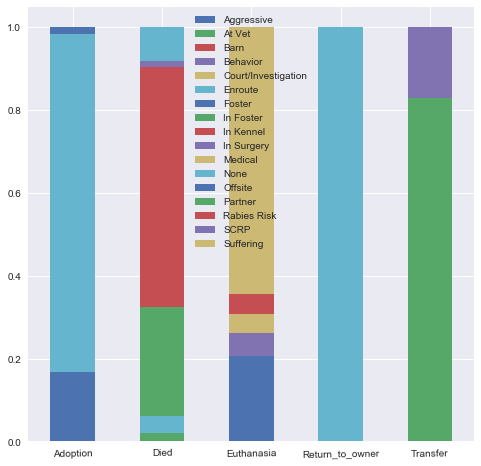

In [30]:
sub_df2.T.plot(kind='bar', stacked=True, rot=1, figsize=(8, 8))

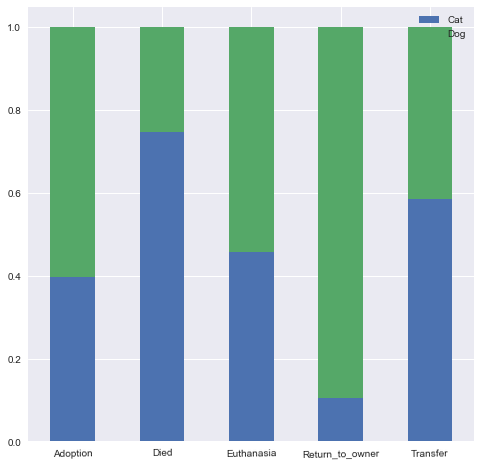

In [31]:
subset = df[['AnimalType', 'OutcomeType']]
tuples = [tuple(x) for x in subset.values]
val_3=Counter(tuples)
sub_df1 = pd.DataFrame(val_3.values(), columns=['count'], index=pd.MultiIndex.from_tuples(val_3.keys()))
sub_df2 = sub_df1.unstack()
sub_df2.columns = sub_df2.columns.droplevel()
sub_df2 = sub_df2.div(sub_df2.sum())

sub_df2.T.plot(kind='bar', stacked=True, rot=1, figsize=(8, 8))

* AnimalType 별 차이가 큼을 확인할 수 있었음
* Name, AgeuponOutcome, SexuponOutcome, OutcomeType 등에서 큰 차이가 있음
* Dog과 Cat을 분리하여 분석해야 할 필요성이 발생

### DataFrame 생성 (Dog/Cat)

In [32]:
Dog = df[df['AnimalType'] == 'Dog']
Cat = df[df['AnimalType'] == 'Cat']

In [33]:
Dog.head()

AnimalID     Name             DateTime      OutcomeType OutcomeSubtype  \
0  A671945    Named  2014-02-12 18:22:00  Return_to_owner           None   
2  A686464    Named  2015-01-31 12:28:00         Adoption         Foster   
4  A667013  Unnamed  2013-11-15 12:52:00         Transfer        Partner   
5  A677334    Named  2014-04-25 13:04:00         Transfer        Partner   
8  A671784    Named  2014-02-04 17:17:00         Adoption           None   

  AnimalType SexuponOutcome  AgeuponOutcome  \
0        Dog  Neutered Male             365   
2        Dog  Neutered Male             730   
4        Dog  Neutered Male             730   
5        Dog  Intact Female              30   
8        Dog  Spayed Female             150   

                               Breed        Color Type  
0              Shetland Sheepdog Mix  Brown/White  Mix  
2                       Pit Bull Mix   Blue/White  Mix  
4        Lhasa Apso/Miniature Poodle          Tan  Mix  
5  Cairn Terrier/Chihuahua Shorthair    Black/Tan  Mix  
8      American Pit Bull Terrier Mix    Red/White  Mix

In [34]:
Cat.head()

AnimalID     Name             DateTime OutcomeType OutcomeSubtype  \
1   A656520    Named  2013-10-13 12:44:00  Euthanasia      Suffering   
3   A683430  Unnamed  2014-07-11 19:09:00    Transfer        Partner   
6   A699218    Named  2015-03-28 13:11:00    Transfer        Partner   
7   A701489  Unnamed  2015-04-30 17:02:00    Transfer        Partner   
10  A668402  Unnamed  2013-12-05 15:50:00    Transfer           SCRP   

   AnimalType SexuponOutcome  AgeuponOutcome                   Breed  \
1         Cat  Spayed Female             365  Domestic Shorthair Mix   
3         Cat    Intact Male              21  Domestic Shorthair Mix   
6         Cat    Intact Male              21  Domestic Shorthair Mix   
7         Cat        Unknown              21  Domestic Shorthair Mix   
10        Cat        Unknown             730  Domestic Shorthair Mix   

          Color Type  
1   Cream Tabby  Mix  
3    Blue Cream  Mix  
6    Blue Tabby  Mix  
7   Brown Tabby  Mix  
10        Black  Mix

### Dog Breed 분류
* American Kernel Club의 기준에 따른 품종군 분류 (Working, Toy, Terrier, Herding, Sporting, Non-sporting) 
* Pure, Mix 여부는 먼저 파악하였으므로, 이번엔 Breed를 파악
* Breed는 AKC 분류를 기준으로 분류한다,
* /로 표시된 경우, 앞의 Breed를 기준으로 한다.

In [35]:
Breed = pd.read_csv('data/breed.csv')

In [36]:
def breed_optimal(x):
    if '/' in x:
        x = x[0:x.index('/')]
        return x
    elif ' Mix' in x:
        x = x[0:-4]
        return x
    else:
        return x

In [37]:
Dog['Breed'] = Dog['Breed'].apply(breed_optimal)

C:\Python27\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [38]:
Dog.head()

AnimalID     Name             DateTime      OutcomeType OutcomeSubtype  \
0  A671945    Named  2014-02-12 18:22:00  Return_to_owner           None   
2  A686464    Named  2015-01-31 12:28:00         Adoption         Foster   
4  A667013  Unnamed  2013-11-15 12:52:00         Transfer        Partner   
5  A677334    Named  2014-04-25 13:04:00         Transfer        Partner   
8  A671784    Named  2014-02-04 17:17:00         Adoption           None   

  AnimalType SexuponOutcome  AgeuponOutcome                      Breed  \
0        Dog  Neutered Male             365          Shetland Sheepdog   
2        Dog  Neutered Male             730                   Pit Bull   
4        Dog  Neutered Male             730                 Lhasa Apso   
5        Dog  Intact Female              30              Cairn Terrier   
8        Dog  Spayed Female             150  American Pit Bull Terrier   

         Color Type  
0  Brown/White  Mix  
2   Blue/White  Mix  
4          Tan  Mix  
5    Black/Tan  Mix  
8    Red/White  Mix

In [39]:
Dog['Breed'] = Dog['Breed'].replace('Pit Bull', 'Bull Terrier')
Dog['Breed'] = Dog['Breed'].replace('German Shepherd', 'German Shepherd Dog')
Dog['Breed'] = Dog['Breed'].replace('Anatol Shepherd', 'Anatolian Shepherd Dog')
Dog['Breed'] = Dog['Breed'].replace('Catahoula', 'Catahoula Cur')
Dog['Breed'] = Dog['Breed'].replace('Staffordshire', 'American Staffordshire Terrier')
Dog['Breed'] = Dog['Breed'].replace('Doberman Pinsch', 'Doberman Pinscher')
Dog['Breed'] = Dog['Breed'].replace('Queensland Heeler', 'Australian Cattle Dog')
Dog['Breed'] = Dog['Breed'].replace('Flat Coat Retriever', 'Flat-Coated Retriever')
Dog['Breed'] = Dog['Breed'].replace('Chinese Sharpei', 'Chinese Shar Pei')
Dog['Breed'] = Dog['Breed'].replace('Rhod Ridgeback', 'Rhodesian Ridgeback')
Dog['Breed'] = Dog['Breed'].replace('Soft Coated Wheaten Terrier', 'Soft-Coated Wheaten Terrier')
Dog['Breed'] = Dog['Breed'].replace('Bruss Griffon', 'Brussels Griffon')
Dog['Breed'] = Dog['Breed'].replace('Redbone Hound', 'Redbone Coonhound')
Dog['Breed'] = Dog['Breed'].replace('West Highland', 'West Highland White Terrier')
Dog['Breed'] = Dog['Breed'].replace('Wire Hair Fox Terrier', 'Wire Fox Terrier')
Dog['Breed'] = Dog['Breed'].replace('Dogo Argentino', 'Mastiff')
Dog['Breed'] = Dog['Breed'].replace('Alaskan Husky', 'Alaskan Malamute')
Dog['Breed'] = Dog['Breed'].replace('Pbgv', 'Petit Basset Griffon Vendeen')
Dog['Breed'] = Dog['Breed'].replace('Chesa Bay Retr', 'Chesapeake Bay Retriever')
Dog['Breed'] = Dog['Breed'].replace('Cavalier Span', 'Cavalier King Charles Spaniel')
Dog['Breed'] = Dog['Breed'].replace('Dutch Shepherd', 'Dutch Shepherd Dog')
Dog['Breed'] = Dog['Breed'].replace('English Coonhound', 'American English Coonhound')
Dog['Breed'] = Dog['Breed'].replace('American Eskimo', 'American Eskimo Dog')
Dog['Breed'] = Dog['Breed'].replace('Bluetick Hound', 'Bluetick Coonhound')
Dog['Breed'] = Dog['Breed'].replace('Patterdale Terr', 'Patterdale Terrier')
Dog['Breed'] = Dog['Breed'].replace('Chinese Crested', 'Chinese Crested Dog')
Dog['Breed'] = Dog['Breed'].replace('Podengo Pequeno', 'Portuguese Podengo Pequeno')
Dog['Breed'] = Dog['Breed'].replace('Dogue De Bordeaux', 'Dogue de Bordeaux')
Dog['Breed'] = Dog['Breed'].replace('Boykin Span', 'Boykin Spaniel')
Dog['Breed'] = Dog['Breed'].replace('Landseer', 'Newfoundland')
Dog['Breed'] = Dog['Breed'].replace('Schnauzer Giant', 'Giant Schnauzer')
Dog['Breed'] = Dog['Breed'].replace('Glen Of Imaal', 'Glen of Imaal Terrier')
Dog['Breed'] = Dog['Breed'].replace('Treeing Cur', 'Treeing Walker Coonhound')
Dog['Breed'] = Dog['Breed'].replace('Bedlington Terr', 'Bedlington Terrier')
Dog['Breed'] = Dog['Breed'].replace('Picardy Sheepdog', 'Berger Picard')
Dog['Breed'] = Dog['Breed'].replace('Presa Canario', 'Mastiff')
Dog['Breed'] = Dog['Breed'].replace('Nova Scotia Duck Tolling Retriever', 'Nova Scotia Duck-Tolling Retriever')
Dog['Breed'] = Dog['Breed'].replace('Port Water Dog', 'Portuguese Water Dog')
Dog['Breed'] = Dog['Breed'].replace('Mexican Hairless', 'American Hairless Terrier')
Dog['Breed'] = Dog['Breed'].replace('Treeing Tennesse Brindle', 'Treeing Walker Coonhound')
Dog['Breed'] = Dog['Breed'].replace('Entlebucher', 'Entlebucher Mountain Dog')
Dog['Breed'] = Dog['Breed'].replace('Sealyham Terr', 'Sealyham Terrier')
Dog['Breed'] = Dog['Breed'].replace('Black', 'Black and Tan Coonhound')
Dog['Breed'] = Dog['Breed'].replace('Unknown', 'Chihuahua Shorthair')

C:\Python27\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Python27\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Python27\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.

C:\Python27\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Python27\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Python27\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Python27\lib\sit

In [40]:
def AKC(x):
    Breed = pd.read_csv('data/breed.csv')
    t_list = []
    for j in range(0, len(Breed['Breed'])): 
        if Breed['Breed'][j] in x:
            t_list.append(Breed['Type'][j])
    if t_list:
        x = t_list[0]
        return x
    else:
        x = 'None'
        return x

In [41]:
Dog['AKC'] = Dog['Breed'].apply(AKC)

C:\Python27\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [42]:
Dog.head()

AnimalID     Name             DateTime      OutcomeType OutcomeSubtype  \
0  A671945    Named  2014-02-12 18:22:00  Return_to_owner           None   
2  A686464    Named  2015-01-31 12:28:00         Adoption         Foster   
4  A667013  Unnamed  2013-11-15 12:52:00         Transfer        Partner   
5  A677334    Named  2014-04-25 13:04:00         Transfer        Partner   
8  A671784    Named  2014-02-04 17:17:00         Adoption           None   

  AnimalType SexuponOutcome  AgeuponOutcome                      Breed  \
0        Dog  Neutered Male             365          Shetland Sheepdog   
2        Dog  Neutered Male             730               Bull Terrier   
4        Dog  Neutered Male             730                 Lhasa Apso   
5        Dog  Intact Female              30              Cairn Terrier   
8        Dog  Spayed Female             150  American Pit Bull Terrier   

         Color Type           AKC  
0  Brown/White  Mix       Herding  
2   Blue/White  Mix       Terrier  
4          Tan  Mix  Non-Sporting  
5    Black/Tan  Mix       Terrier  
8    Red/White  Mix       Terrier

In [43]:
Dog['AKC'].value_counts()

Terrier         3621
Toy             3234
Herding         2542
Sporting        2433
Working         1505
Hound           1298
Non-Sporting     962
Name: AKC, dtype: int64

### Data Store
* 전처리를 반복하는 과정에서 시간이 많이 소모되므로, 바로 불러낼 수 있도록 처리

In [44]:
import pickle

In [46]:
df.to_pickle('data/main.pkl')
Dog.to_pickle('data/Dog.pkl')
Cat.to_pickle('data/Cat.pkl')